![taller_python](https://github.com/fifabsas/talleresfifabsas/blob/master/python/2_Numerico/fig/logo_fifa.png?raw=true)

# Taller de Python Capítulo 3:  Práctica
[Link al notebook en Google Colaboratory](https://colab.research.google.com/drive/1K188p9vwJIG25aP3yi8EKm5xhDhe_wZm?usp=sharing)

## Nuestra motivación para hoy


La idea de hoy es que aprendan un poquito sobre otro tipo de objeto que existe en Python: los `diccionarios` y sobre una función que puede serles útil en el futuro: `find_peaks`.

Una vez aprendido esto, ¡Ponemos las manos en la masa y nos peleamos mucho rato con ejercicios re divertidos!.


## Diccionarios

Los diccionarios son otro tipo de objetos útiles, en cierta forma similares a las listas, que nos permiten vincular un valor con otro.

Estos se definen abriendo y cerrando corchetes.

Supongamos que queremos guardar en una variable los nombres de personajes importantes en la ciencia y relacionarlos a los campos en los que trabajaron.

In [ ]:
diccionario = {'Rosalind Franklin':'Química', 'Luis Caffarelli':'Matemática', 'Juan G. Roederer':'Física', 'Emmy Noether':'Matemática'}

La parte que va a la _izquierda_ de los `:` se llama **llave**, mientras que lo que escribimos a la _derecha_ se llama **valor**.

Es decir, la llave `Rosalind Franklin` tiene el valor `Química`.

Hay varias formas de recorrer estos objetos con un `for`, pero la más importante es la siguiente, utilizando el método `.items()`:

In [ ]:
for llave, valor in diccionario.items():
    print(f"La persona {llave} se dedica a la {valor}")
    print()

La persona Rosalind Franklin se dedica a la Química

La persona Luis Caffarelli se dedica a la Matemática

La persona Juan G. Roederer se dedica a la Física

La persona Emmy Noether se dedica a la Matemática



Para agregar un elemento al diccionario se hace de la siguiente manera:

In [ ]:
diccionario['Ada Lovelace'] = 'Computación'

print(diccionario)

{'Rosalind Franklin': 'Química', 'Luis Caffarelli': 'Matemática', 'Juan G. Roederer': 'Física', 'Emmy Noether': 'Matemática', 'Ada Lovelace': 'Computación'}


Cada llave tiene un valor **único** y pueden tener adentro números, strings, listas o inclusive otro diccionario.

In [ ]:
diccionario_raro = {"Milanesa": 12, "Almohada": "No tengo", "Precios boleto": [270,300,330,404]}

In [ ]:
diccionario_raro[[12,13,14]] = "¿Podré hacer esto?"

## `find_peaks`: *como encontrar máximos y mínimos*

In [ ]:
# Importamos las librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt

Supongamos que tenemos los datos de la siguiente figura y queremos saber cuales son los máximos de la señal.

¿Cómo hacemos?

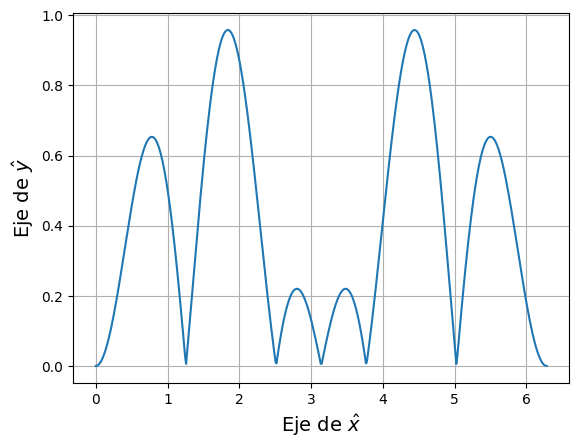

In [ ]:
# Definimos el dominio y la imagen
x = np.linspace(0, 2*np.pi, 500)
y = np.abs(np.sin(x)*np.sin(2.5*x))

# Graficamos la función
plt.plot(x, y)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

Para eso existe ```find_peaks```, una función de la librería llamada ```scipy``` que tiene un montón de cosas útiles para hacer ciencia.

In [ ]:
# De esta manera importamos solo la función y no la librería entera, que puede ser pesada
from scipy.signal import find_peaks

```find_peaks``` recibe una lista/array de una dimensión y calcula los máximos locales.

Apliquemos la función a nuestra tira de datos ```y``` para ver que nos devuelve.

In [ ]:
picos, diccionario = find_peaks(y) # Recordemos esta forma de nombrar varias variables

picos, diccionario

(array([ 62, 146, 223, 276, 353, 437]), {})

```find_peaks``` devuelve primero un array con los índices donde encontró máximos y luego un diccionario, que está vacío, pero más adelante vamos a ver que cosas puede contener.

De momento, graficamos los picos para ver que encontró ```find_peaks``` de base.

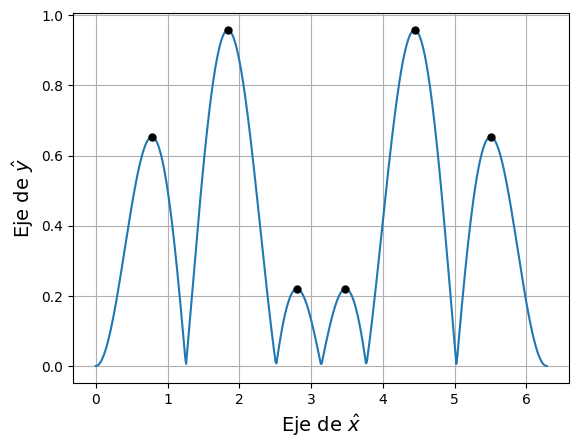

In [ ]:
# Graficamos la función
plt.plot(x, y)
plt.plot(x[picos], y[picos],".", c = "k", ms = 10)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

¡```find_peaks``` logró hallar todos los picos! ¡Es increíble!

Veamos ahora otro caso.

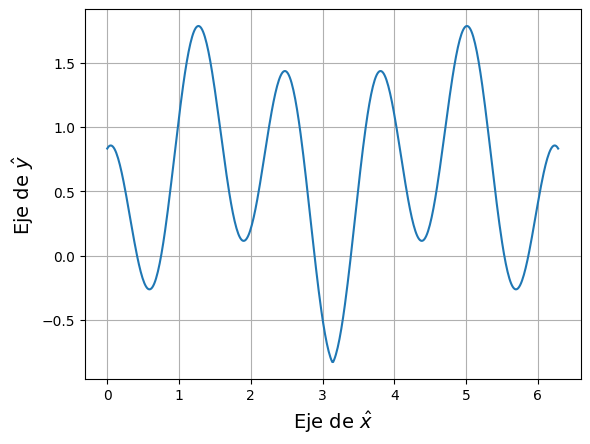

In [ ]:
# Definimos el dominio y la imagen
x = np.linspace(0, 2*np.pi, 500)
y = np.abs(np.sin(x))+np.cos(5*x)/1.2

# Graficamos la función
plt.plot(x, y)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

Ahora quiero los picos más grandes nada más.

¿Que parámetro los caracteriza como para que  ```find_peaks``` encuentre solo esos?


 ### Respuesta ***(¡Animense a contestar dale!)***

**Hay varias cosas que podríamos usar:**

*   La distancia entre los picos (en índices, por lo que se complica un poco)
*   La altura de los picos.


**Si utilizamos la altura de los picos obtenemos:**


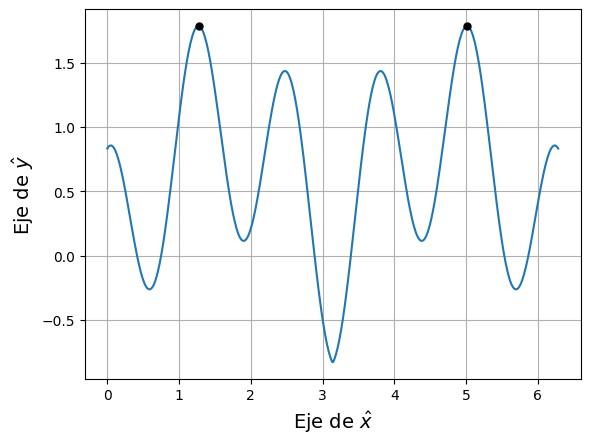

In [ ]:
# Calculamos los picos
picos, diccionario = find_peaks(y, height = 1.5) # Acá agrego el parámetro

# Graficamos la función
plt.plot(x, y)
plt.plot(x[picos], y[picos],".", c = "k", ms = 10)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

¡Conseguimos lo que queremos! También podriamos haberle pasado la distancia u otro parámetro para que la función cuente con la mayor información posible.

Podemos ver ahora que cambio el diccionario, este contiene ahora la altura de los picos.

In [ ]:
diccionario

{'peak_heights': array([1.78657323, 1.78657323])}

Veamos otro parámetro más: el ```threshold```.

El ```threshold``` delimita de cuanto puede ser el salto del máximo respecto a los otros puntos. Podemos asignarle un mínimo y un máximo a la diferencia que puede tener un máximo respecto a sus vecinos.

Para poder verlo con este mismo ejemplo, disminuyo la cantidad de puntos.

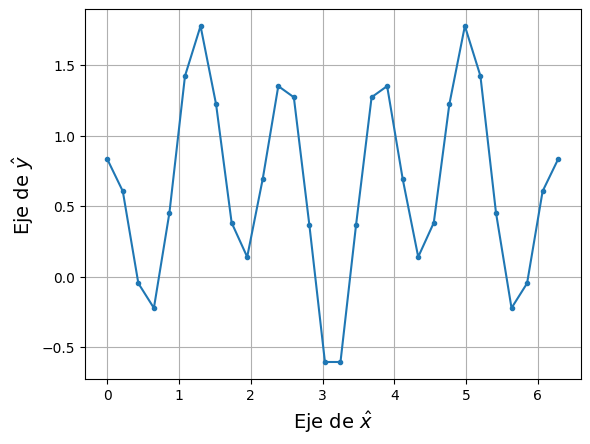

In [ ]:
# Definimos el dominio y la imagen
x = np.linspace(0, 2*np.pi, 30)
y = np.abs(np.sin(x))+np.cos(5*x)/1.2

# Graficamos la función
plt.plot(x, y,".-")
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

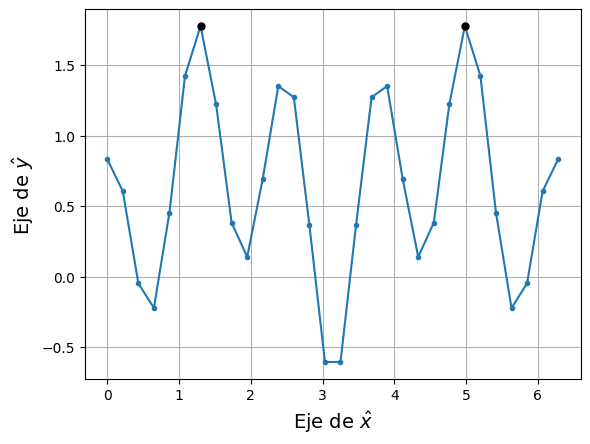

In [ ]:
# Calculamos los picos
picos, diccionario = find_peaks(y, threshold = [0.1,2]) # Acá agrego el parámetro

# Graficamos la función
plt.plot(x, y, ".-")
plt.plot(x[picos], y[picos],".", c = "k", ms = 10)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

### Muy lindo todo esto... ¿Pero cómo puedo calcular los mínimos con ```find_peaks```?

Muy fácil: ¡Invertimos los datos!

Así los mínimos pasan a ser los máximos y viceversa.

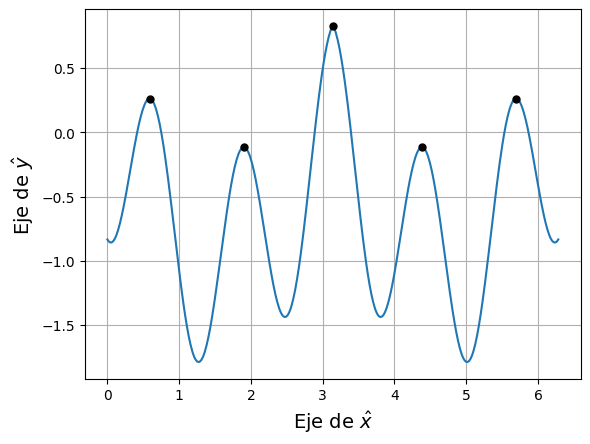

In [ ]:
# Definimos el dominio y la imagen
x = np.linspace(0, 2*np.pi, 500)
y = np.abs(np.sin(x))+np.cos(5*x)/1.2

# Calculamos los picos
picos, diccionario = find_peaks(-y) # Acá agrego el parámetro

# Graficamos la función
plt.plot(x, -y)
plt.plot(x[picos], -y[picos],".", c = "k", ms = 10)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

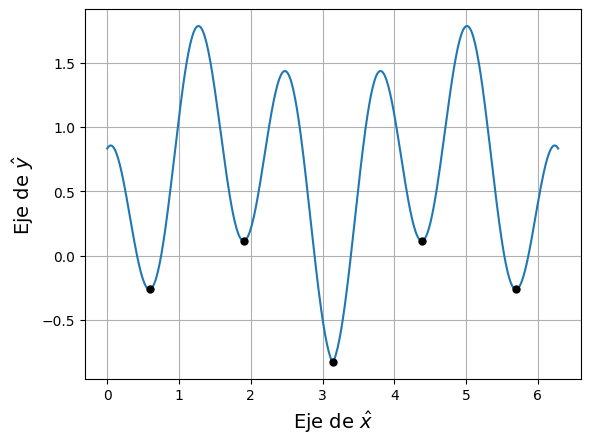

In [ ]:
# Calculamos los picos
picos, diccionario = find_peaks(-y) # Acá agrego el parámetro

# Graficamos la función
plt.plot(x, y)
plt.plot(x[picos], y[picos],".", c = "k", ms = 10)
plt.xlabel('Eje de $\hat x$', fontsize = 14)
plt.ylabel('Eje de $\hat y$', fontsize = 14)

plt.grid()
plt.show()

Con esto termina todo lo que teníamos para enseñarles hoy, ahora les toca aprender por su cuenta, llegó la hora de elegir un problema y pensar un rato largo.

## ¡Manos a la obra!

## _Problema integrador 1 (Física)_

En un laboratorio se armó el montaje que se muestra a continuación: un carrito sujeto a un resorte fijo en uno de sus extremos.

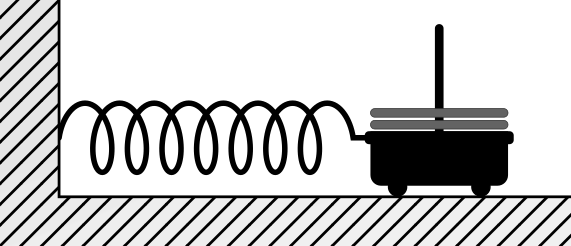

Se propuso estudiar como la masa del carrito (que se podía variar agregando pesas sobre el) afectaba su frecuencia de oscilación. Con este objetivo, se realizó el siguiente procedimiento 9 veces, comenzando con el carrito vacío y agregando una pesa en cada iteración:

1. Se comenzaba a grabar el carrito con una cámara lateral al montaje.
2. El carrito se alejaba $5~\mathrm{cm}$ de su posición de equilibrio y se soltaba.
3. $10~\mathrm{s}$ después de soltar el carrito, se cortaba la grabación. Esta se guardaba como `[n].mp4`, con `[n]` el número de pesas sobre el carrito.

Finalmente se subieron todas las grabaciones a un software de trackeo, calibrado para poder medir la distancia del carrito a su posición de equilibrio cada $0.2~\mathrm{s}$ desde que se soltó. Los datos de cada grabación se guardaron en archivos nombrados `[n].csv`, con `[n]` el número de pesas correspondiente.

La idea es ahora hacer el análisis de las mediciones, que se pueden encontrar en este [link](https://github.com/fifabsas/talleresfifabsas/blob/4e61cb2c20365fd6c299ce317c963ff2b09d6201/python/3_Ejercicios/Datos%20Ejercicio%201%20-%20F%C3%ADsica/Datos%20Ejercicio%201%20-%20F%C3%ADsica.zip), en Python.

---

### Ejercicio 1 (para ir entrando en calor)

Escribir una función llamada `masa_carrito(n)` que tome:
- `n`: el número de pesas colocadas en el carro.

y que devuelva:
- `m`: la masa total del carrito.

Considerar que cada una de las pesas tenía una masa de $5~\mathrm{g}$ y la masa del carrito sin pesas era de $15~\mathrm{g}$.

---

Cada `.csv` tiene 3 columnas: "T [s]" para los tiempos, "X [cm]" para la posición, y "X_err [cm]" para la incerteza en la posicion. Las mediciones de tiempo también tienen incerteza, pero mucho más chica y la vamos a despreciar en el análisis. También despreciariemos las incertezas en las mediciones de masa. (Si llegan a encontrarse con un experimento similar en un labo, registren todas las incertezas y hablen con sus profes antes de no tener en cuenta incertezas en algún cálculo o ajuste).

De cada archivo queremos obtener una frecuencia de oscilación. Para enfrentar esta tarea, vamos a empezar analizando solo un archivo, `0.csv`, y luego veremos como adaptar el código para poder analizar los otros .csv's sin hacer mucho más trabajo.

---
### Ejercicio 2: Abrir y graficar `0.csv`

Queremos empezar graficando la posición en función del tiempo del carrito sin pesitas, para observar las mediciones registradas que pueden encontrar [acá](https://github.com/fifabsas/talleresfifabsas/blob/4e61cb2c20365fd6c299ce317c963ff2b09d6201/python/3_Ejercicios/Datos%20Ejercicio%201%20-%20F%C3%ADsica/Datos%20Ejercicio%201%20-%20F%C3%ADsica.zip).

1. Importar `numpy` y `matplotlib.pyplot` para poder acceder a las funciones de Numpy y del módulo `pyplot` de Matplotlib. Usar las abreviaciones estandar `np` y `plt` (ver clase pasada).
2. Cargar los datos del archivo `"0.csv"` subiendolo a Colab y usando la función `np.loadtxt`. Guardar:
    - los _tiempos_ de las mediciones en la variable `ts`,
    - las _posiciones_ medidas en `xs`,
    - y las _incertezas_ de las posiciones en `xs_err`.
    
    _Para usar la función `np.loadtxt` tienen de referencia el material de la clase pasada o la documentación de Numpy_.
3. Usar la función `plt.errorbar` para gráficar `xs` en función de `ts` (`ts` corresponde al eje $\hat x$ del gráfico, mientras que `xs` corresponde al eje $\hat y$). Incluir las incertezas en la posición.
4. Etiquetar los ejes del gráfico "Posición [cm]" y "Tiempo [s]"
5. _(opcional)_ Embellecer.

---

### UN PROBLEMA COMÚN



Ahora que vimos que los datos tienen un comportamiento oscilatorio, como es de esperar por la naturaleza del experimento, nuestro objetivo es medir su frecuencia de oscilación. Nos gustaría hacer un ajuste sinusoidal, pero como vimos la vez pasada, `curve_fit` no siempre devuelve los parámetros más óptimos. A veces devuelve los parámetros correspondientes a algún otro mínimo local de la función RMSE. Veamoslo con los datos de `0.csv`, ajustandolos con un coseno:

In [1]:
#@title código secreto (solo abrir con doble-click **luego de haber intentado el Ejercicio 2**)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ts, xs, xs_err = np.loadtxt("0.csv", delimiter = ",", unpack = True, skiprows = 1)

def sinusoidal(t, A, w, phi):
    return A*np.cos(w*t + phi)

popt, pcov = curve_fit(sinusoidal, ts, xs)
A, w, phi = popt

ts_ajuste = np.linspace(min(ts), max(ts), 1000)
xs_ajuste = sinusoidal(ts_ajuste, A, w, phi)

plt.errorbar(ts, xs, yerr = xs_err, fmt = "s", ms = 2, capsize = 2, color = "k")
plt.plot(ts_ajuste, xs_ajuste, color = "r")
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [cm]")
plt.show()

**¿Como solucionamos esto?** Como repaso, queremos que `curve_fit` empieze a buscar los parámetros óptimos _cerca de la solución que esperamos_, que se puede hacer pasandole parámetros iniciales a través del argumento `p0`:
```python
popt, pcov = curve_fit(sinusoidal, t, x, p0 = [5, w_aprox, 0])
```
De esta forma, la función va a buscar la frecuencia óptima cerca de la frecuencia aproximada `w_aprox`.

La pregunta es ahora, **¿de donde sacamos estos parámetros iniciales?** Algunas posibilidades:
- **Usando más información:** Por ejemplo, ya sabemos que la amplitud de la curva debe ser aproximadamente 5 cm por el procedimiento llevado a cabo en el laboratorio. De la misma forma, sabemos que el defasaje `phi` del coseno debe estar cerca del 0.
- **A ojo:** Observamos el gráfico y elegímos parámetros razonables. Se puede aproximar la frecuencia estimando primero el período $T$ de las oscilaciones. $T$ está dado por el tiempo que tarda el carrito en alejarse de y volver a un máximo, como se puede ver en el siguiente gráfico:
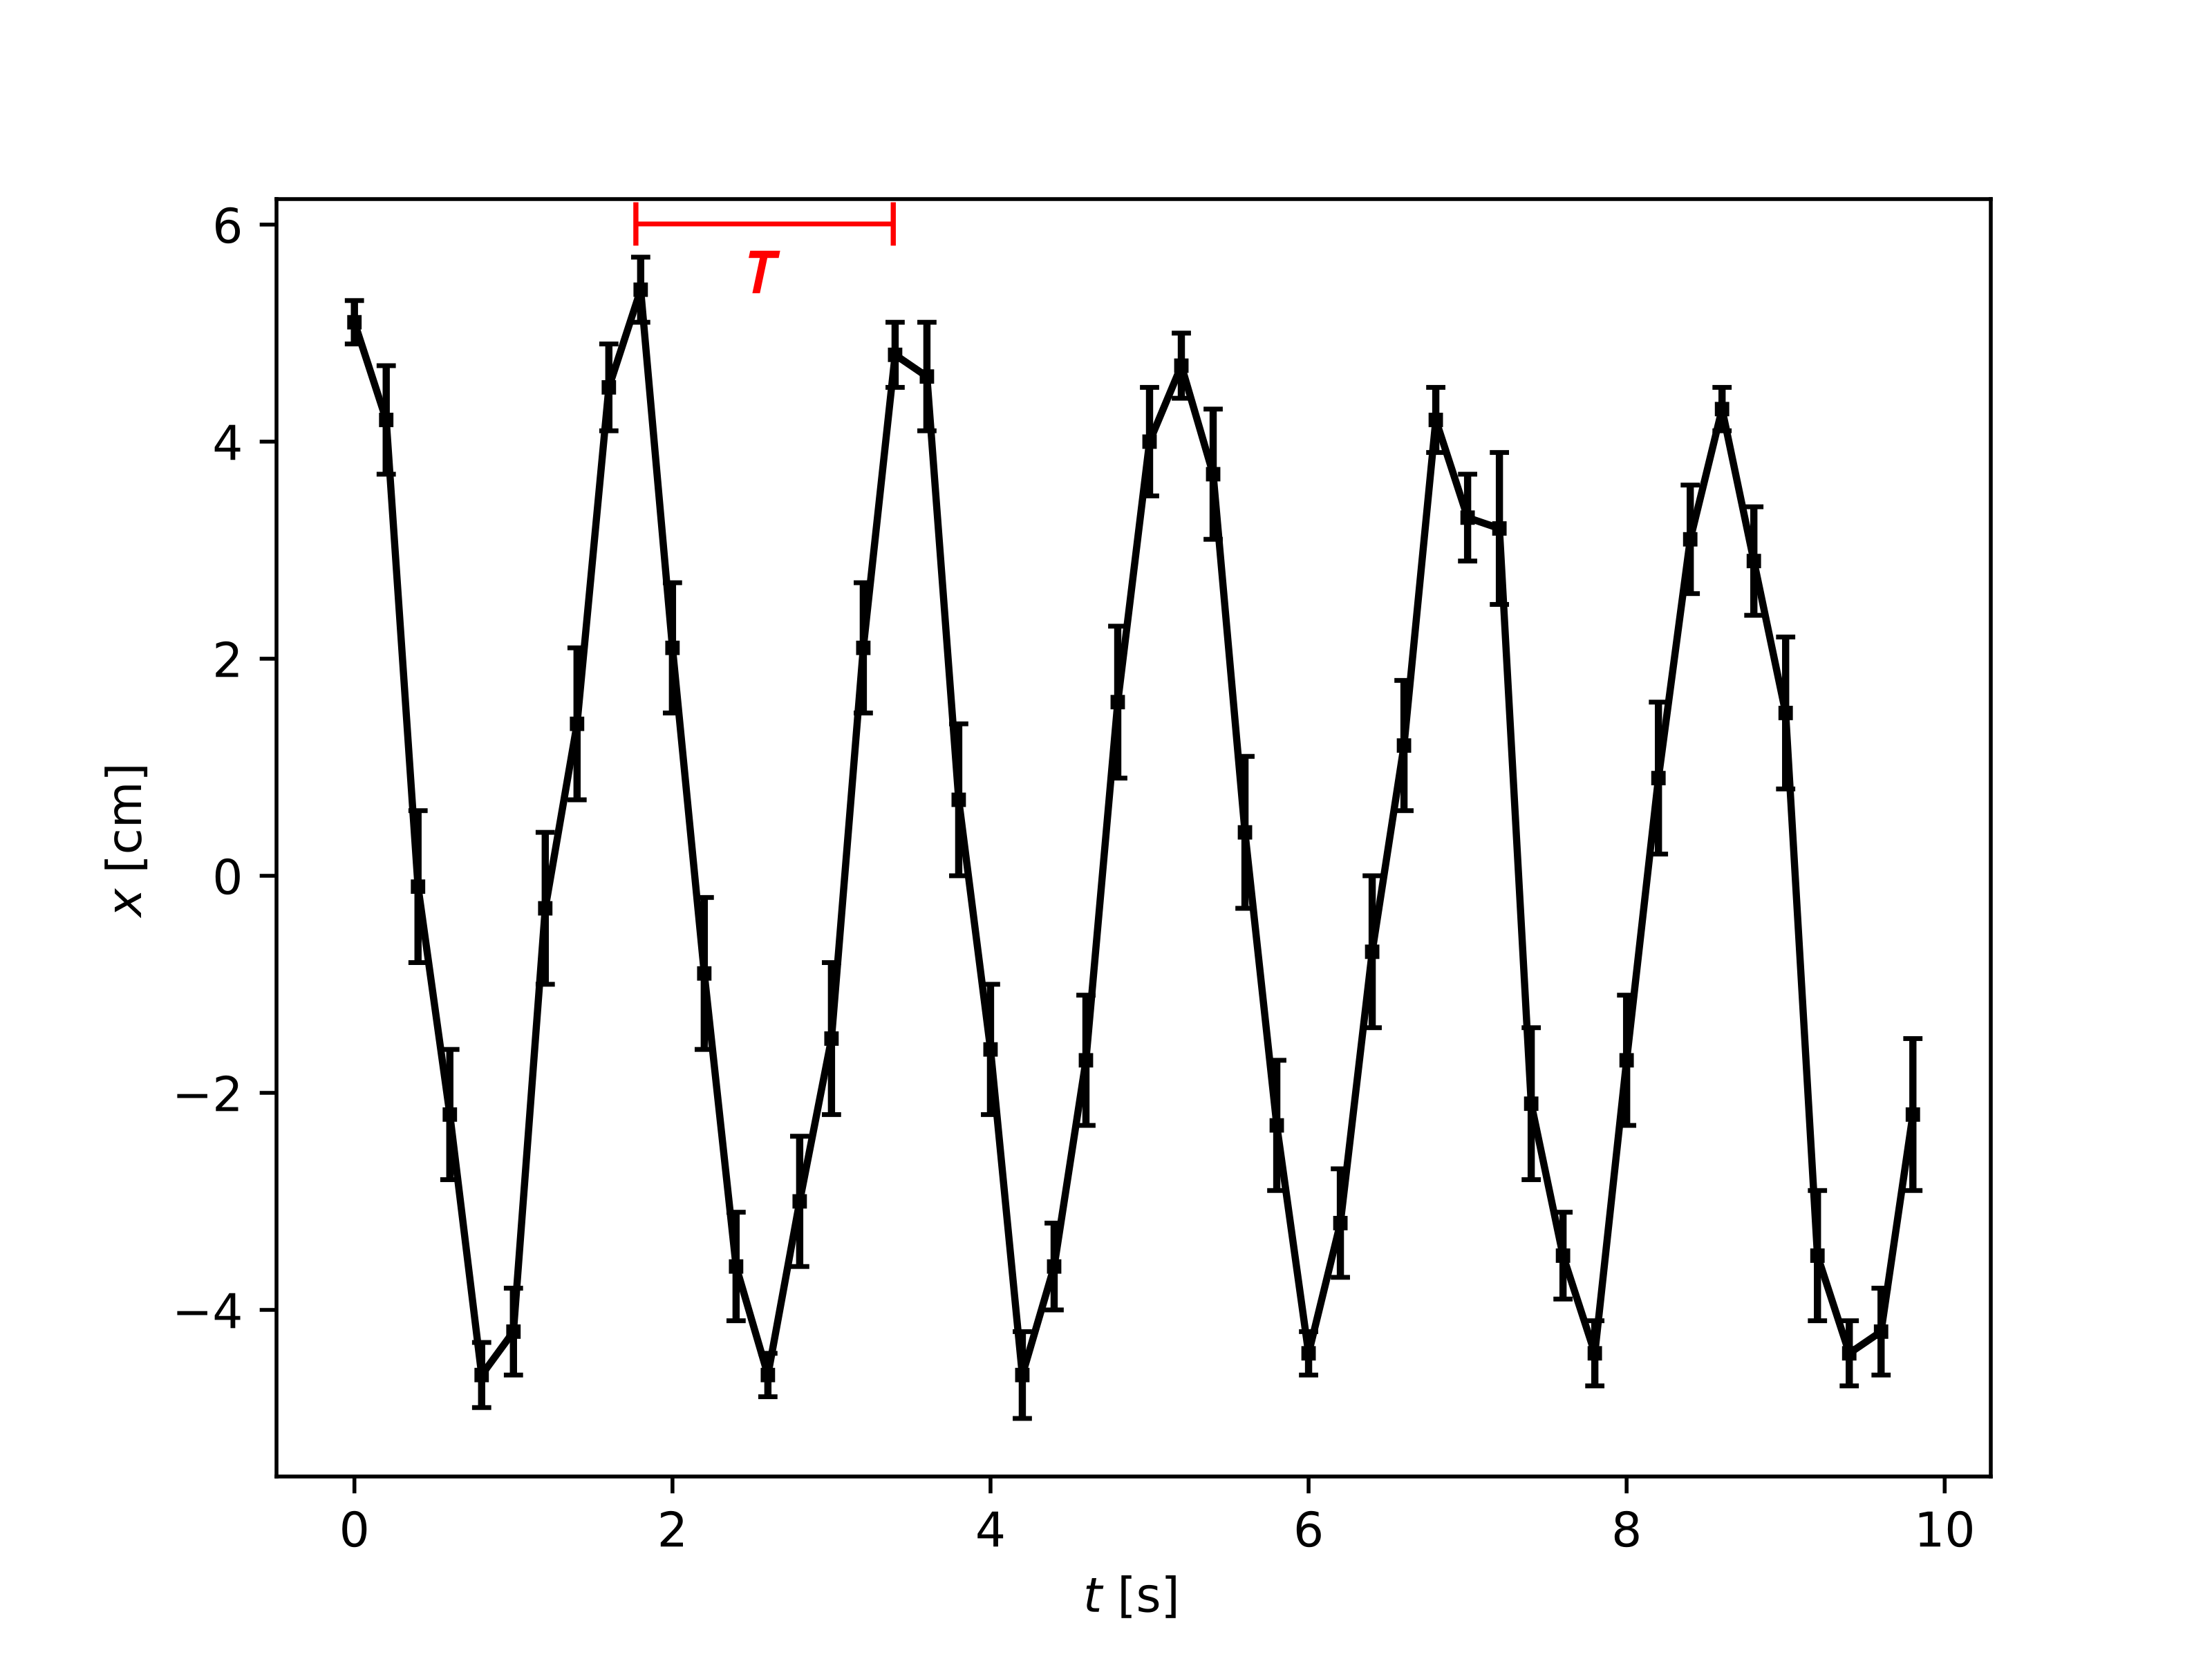
La frecuencia aproximada se calcula entonces con $\omega_\text{aprox} = 2\pi/T$.

- **Usando `find_peaks`:** Una forma de automatizar el método "a ojo" es midiendo el período de las oscilaciones usando `find_peaks`. Esto es lo que vamos a usar ahora, ya que tenemos muchos datos para analizar y el método "a ojo" puede ser tedioso.


---
### Ejercicio 3: Estimar la frecuencia de las oscilaciones usando `find_peaks`

Lo que queremos hacer es medir el intervalo de tiempo entre los dos primeros picos de amplitud. Recordemos que `find_peaks` devuelve los indices de los picos del array que le damos y un diccionario con más información.

1. Aplicar `find_peaks` al array de posiciónes `xs` de `0.csv`. Imprimir `picos` y el diccionario.

2. Graficar los datos de `0.csv` nuevamente. Luego, graficar los picos encontrados por `find_peaks` con `plt.plot(ts[picos], xs[picos])`. ¿Coinciden los picos con lo que esperan?

3. Calcular el periódo `T`. _Ayuda: ¿cuanto vale el tiempo en el segundo pico? ¿y en el primero? Restando estos valores van a poder obtener la respuesta!_

4. Calcular la frecuencia usando que $\omega = 2\pi / T$.

_Nota: Estamos usando este método para estimar los parámetros iniciales, pero se podría usar para medir la frecuencia. El tema es que no estamos calculando la incerteza del valor del $\omega$ que obtenemos, y **una medición tiene incerteza**. Si queres conversar un poco más del tema, llama a un profe!_

---

---
### Ejercicio 4: Hacer un ajuste sinusoidal usando la frecuencia estimada

1. Usando `curve_fit`, obtener $\omega$ de `popt` (los parámetros óptimos), y su error de `pcov` (la matriz de covarianza). _Ayuda: ver clase pasada!_

---

---
### Ejercicio 5: Repetir para los demás archivos guardando los datos de la masa y la frecuencia.

**Acá**, _esto_ es porque programar es _super útil_. Ya trabajaste un montón para analizar `0.csv`. El solo pensamiento de repetirlo 10 veces te pone los pelos de punta. ¡Pero no lo tenés que hacer! Copiando el código que ya hiciste, ordenandolo un poco y usando la mágia de las iteraciones vas a haber analizado todo en un suspiro.

1. Inicializar tres listas vacías, `[]`, guardandolas en las variables `ms`, `ws`, y `ws_err`. En estas listas vamos a guardar la masa y frecuencia correspondientes a cada archivo.

2. Recorrer los archivos `"0.csv"` a `"8.csv"` _(recordar subirlos a Colab)_ con un `for`, obteniendo la frecuencia de los datos y la masa total del carrito en cada uno. Si les ayuda, pueden usar la siguiente planilla:

```python
for i in range(10):
    ts, xs, xs_err = np.loadtxt(f"{COMPLETAR}.csv", delimiter = COMPLETAR, unpack = COMPLETAR)

    # USAR FIND_PEAKS PARA ESTIMAR LA FRECUENCIA (COPIAR CÓDIGO ANTERIOR, OJO CON LAS INDENTACIONES).

    # USAR CURVE_FIT PARA CONSEGUIR EL VALOR DE LA FRECUENCIA Y SU ERROR (COPIAR CÓDIGO ANTERIOR, OJO CON LAS INDENTACIONES).

    # AGREGAR FRECUENCIA OBTENIDA A LA LISTA ws
    # AGREGAR ERROR DE LA FRECUENCIA OBTENIDA A LA LISTA ws_err
    # AGREGAR MASA CORRESPONDIENTE A LA LISTA ms
```

3. Graficar `ws` en función de `ms`, mostrando el error de `ws`.

---

---
### Ejercicio 6: El Ajuste Final

El modelo de un oscilador sin amortiguamiento cuya fuerza restitutiva está dada por:
$$
F_\text{resorte} = -kx\qquad \text{(Ley de Hooke)}
$$
con $k$ una constante y $x$ el desplazamiento del oscilador del equilibrio, tiene como frecuencia natural:
$$
\omega(m) = \sqrt{\frac{k}{m}}
$$

1. Ajustar la función $\omega(m) = \sqrt{k/m}$ a los datos de $\omega$ y $m$ que se guardaron en el item anterior, obteniendo el parámetro óptimo para $k$ y su error. Graficar la función ajustada encima de los datos y juzgar si el modelo es apropiado. _Nota: En los labos van a ver herramientas útiles para realizar estas evaluaciones de forma sistemática._
---

## _Problema integrador 2 (Estadística)_

Vamos a resolver probabilísticamente un problema simple.

Si tiramos 100 monedas y las ordenamos en una secuencia como la siguiente:

*"... Cara Cruz Cara Cara Cruz ..."*

¿Qué es más probable? ¿Encontrar la secuencia "Cara Cara" o encontrar la secuencia "Cruz Cara"? ¿Son equiprobables?

Rompamos nuestra cabeza.

Vamos a hacer todo de a pasos.

### **1)** Función ```generar_secuencia(largo)```
Lo primero que tenemos que poder hacer es generar una secuencia de caras y cruces. Como tanto cara como cruz empiezan con la misma letra, las vamos a cambiar por 0 y 1, es decir, estudiaremos cuantas veces aparece la secuencia 00 y cuantas aparece la secuencia 01.

*Creá una función que reciba el largo de la secuencia y devuelva una lista llena de ceros y unos. Para esto, realizá un bucle ```for``` en el genere con cada iteración un 0 o un 1.*

**AYUDA**: La función ```np.random.randint(0,n)``` genera un número aleatorio entre ```0``` y ```n-1```, es decir, no incluye a ```n```, al igual que el ```range```.

### **2)** Función ```calcular_puntajes(secuencia)```

Ahora tenemos que calcular los puntajes de las secuencias que generamos, es decir, hay que recorrer la secuencia y si encuentro un 0 y en el siguiente elemento de la lista otro 0 sumo un punto para la secuencia 00 mientras que si encuentro un 1 y luego un 0 sumo un punto para la secuencia 01.

*Creá una función que reciba una secuencia y devuelva el puntaje obtenido para la secuencia 00 y para la secuencia 01.*

**AYUDITA**: Recorrer la secuencia y fijarse si estoy parado en un 0 ¿Cómo debe ser el siguiente elemento de la lista para que sume un punto a la secuencia 00?

### **3)** *¡A simular!*

Ahora necesitamos hacer estadística, queremos ver que secuencia es más probable que la otra.

Vamos a estudiar secuencias de distintos largos, desde 2 hasta 100 números. ¿Por qué empezamos en 2?

*Para **cada largo**, realizá 1000 secuencias utilizando la función ```generar_secuencia(largo)``` y calculá los puntajes de cada secuencia con  ```calcular_puntajes(secuencia)```. Guardá en variables la cantidad de victorias de cada secuencia **¡y acordate de los empates!**, transformalas en probabilidad (dividilas por 1000, cof cof) y guardalas en tres listas, una para 00, otra para 01 y otra para los empates.*

No hagan más de 1000 secuencias porque sino el código va a empezar a tardar en ejecutarse y acá queremos las cosas ¡YA!. Si tienen ganas de esperar más tiempo pasen a 10000, pero solo pueden hacerlo una vez saben que funciona el código, sino la compu **explota**.

¿Que secuencia crees que va a ser más probable que la otra?


### **4)** *¡Es hora de graficar!*

Llegó el momento de responder la tan esperada pregunta y vamos a hacerlo utilizando un gráfico.

*Graficá las probabilidades de cada secuencia y los empates, en función del largo de la secuencia.*

Es decir, en el eje $\hat{x}$ tendremos el largo de la secuencia y en el eje $\hat{y}$ la probabilidad de cada secuencia.

¡Hacé el gráfico lo más hermoso posible! Ponele grilla, leyenda, nombres a los ejes y labels a cada curva. Si tenés ganas jugá con los colores y preguntanos que tan lindo te quedó el gráfico *(por contrato tenemos que responder que quedó hermoso)*, *(mentira no hay contrato)*.

### **5)** *¡¿Qué está pasando?!*

Respondimos la pregunta de que secuencia tiene más chances de ganar, pero el gráfico no responde el porqué ocurre esto, así que vamos a ahondar más profundo.

*Generá 100000 secuencias de largo 4, calculá la diferencia de puntaje entre 00 y 01 y guardalas en una lista. Hacé un histograma de esa lista utilizando ```plt.hist(lista)``` y hacé el gráfico lo más bello que puedas. ¿Hay alguna tendencia? ¿Con cuanto puntaje máximo gana una secuencia y con cuanto gana la otra?*

Luego, **LUEGO** de hacer esto. Abrí el siguiente enlace. ***¡¡LUEGO ES LUEGO!!***

[¡SOLO LUEGO DE RESOLVER EL INCISO!](https://drive.google.com/file/d/1E6mq9gDdjaWj0hhhsFbvDU-Bb1glLmP0/view?usp=sharing)

Si querés jugá a cambiar el largo de la secuencia para ver como cambian los histogramas.

### **6)** *¡Felicitaciones!*

Con esto hemos podido responder la pregunta, o al menos iluminar bastante la respuesta. Sin embargo podemos seguir aprendiendo cosas.

*Calculá el valor medio y la desviación estándar del histograma que calculaste recién. Utilizá las funciones de numpy ```np.mean(lista)``` y ```np.std(lista)``` y aprendé inglés para saber cual es cual. Anotate en el Laboratorio de idiomas de la UBA y... bueno paro.*

¿Tenes ganas de charlar un rato? Preguntanos que significa ```ddof = 1```.


## _Problema integrador 3 (Biología)_

Vamos a estudiar la dinámica de poblaciones según un modelo clásico de depredador-presa.

¡Lotka-Volterra!

Tanto Lotka como Volterra propusieron de manera independiente un sistema de ecuaciones diferenciales para describir la dinámica de las poblaciones de una población de depredadores y una de presas que interactúan entre sí.


### **1)** *Primero de todo, los datos.com (**No es necesario entrar a esta página**).*

Para arrancar a trabajar necesitamos los datos, sino no podemos hacer nada.

*Utilizando la función ```np.loadtxt()``` (recordar la clase pasada) cargá los datos deL archivo  ```"datos_poblaciones.csv"```. A cada columna asignale el nombre apropiado, es decir, definí las variables ```tiempo```, ```pob_presas``` y ```pob_depredadores```.*

Los datos pueden encontrarse dentro de una carpeta en el siguiente enlace:
[Mercado Pago de la FIFA](https://github.com/fifabsas/talleresfifabsas/tree/master/python/3_Ejercicios)

### **2)** *¡El momento de graficar!*

Lo primero que tenemos que hacer cuando nos dan unos datos, a parte de cargarlos, es graficarlos, así vemos cual es su pinta y podemos pensar en que análisis realizar.

*Utilizando lo que vimos la clase pasada de ```matplotlib```, graficá las poblaciones de presas y depredadores en función del tiempo y hacé que el gráfico sea lo más canchero posible, ponele grilla, leyenda, los colores que vos quieras, etc.*

¿Son las poblaciones como esperabas? *¿No?* $\;$ **Enseñanos algo de biología... ¡Por favor!**

### **3)** *Aprendiendo un poco sobre las poblaciones*

Estaría bueno tener cierto conocimiento general de las poblaciones, como su promedio y cuanto se desvían las poblaciones de este.

*Calculá el promedio de la población de presas utilizando la función de numpy ```np.mean(pob_presas)```.*

¿Es un valor representativo de la población?

*Graficá este promedio en la figura anterior que hiciste, utilizando ```plt.axhline(valor_medio, c = "g", linestyle = "--")```. Probá cambiando los parámetros opcionales.*

*Calculá también la desviación estandar, utilizando ```np.std(pob_presas)```.*

¿Este valor te dice algo más respecto al promedio?
### **4)** *El momento de utilizar ```find_peaks```*

Observamos que las poblaciones oscilan y en particular notamos varios picos.

*Utilizar la función ```find_peaks``` aplicada a la población de las presas, para determinar la posición de los máximos. Grafica los picos en un nuevo gráfico junto a la población de las presas en función del tiempo.*

¿Cuanta población de presas hay en estos picos?

### **5)** *Ciclos poblacionales: ¿¡El espacio de fases??*

Vamos a tomarnos el laburo de hacer un gráfico bello, pero que les puede resultar complicado, así que vamos de a poco.


*Graficá la población de depredadores en función de la población de presas. ¿Qué se observa? ¿¿Alguna especie de ciclo?? Guiño guiño.*


Si lo pensas, en este gráfico perdemos la noción del tiempo, no sabemos de donde parte la población ni donde termina (aunque quizá sí te des cuenta), así que vamos a tomarnos el trabajo de agregarle esto.

*Copiá las siguientes líneas (no hace falta que las entiendas del todo):*

```python
colormap = plt.cm.plasma
norm = colors.Normalize(vmin=min(tiempo), vmax= max(tiempo))
scalar_map = cm.ScalarMappable(norm=norm, cmap=colormap)
```

*Buscá en el navegador: matplotlib colormaps y cambia donde dice ```plasma``` por el colormap que más te guste. Puede ser que el que más te guste sea ```plasma```, a mí me gusta...*

Ahora se viene lo lindo.

*Realizá un ciclo ```for``` que recorra las listas de las poblaciones y graficá para cada ```i```:*

```python
plt.plot([pob_presa[i], pob_presa[i + 1]], [pob_depredador[i], pob_depredador[i + 1]], color= colormap(tiempo[i]/max(tiempo)))
```

¿Que tal el gráfico ahora?

¿Te molesta como quedaron los números del eje x?

*Agregale al gráfico la línea ```plt.xticks(rotation = 45)```, mirá a los ojos a algún docente y decile que pensas que no queda mucho mejor.*


### **6)** *¿Qué te pareció?*

Este fue un ejercicio de biología pensado por una persona que no sabe de biología, así que nos re sirve tener tu opinión!

Te dejamos tu última misión.

*Aprendé programación por tu cuenta el tiempo que sea necesario para formar parte del plantel docente del taller de Python de la FIFA, cambiá este ejercicio y lentamente añadí gente de Biología al taller hasta que pase a ser un taller de estudiantes de Biología **para** estudiantes de Biología. **El taller de Python de la FIBA**.*

## _Ejercicios adicionales sueltos_

La idea de estos ejercicios es que son cortos pero requieren conceptos que son importantes a la hora de programar o son problemas que se van a encontrar en algún momento en el futuro.

Algunos son más divertidos o fáciles que otros, pero no por eso son menos importantes.

### Histogramas




Queremos generar numeros aleatorios con una cierta distribución de probabilidad, en este caso una Gaussiana, que es una distribución muy **normal** *(jajá que buen juego de palabras jajajajajajajajajajajajajajajajajajajajajajaja)* que aparece en todas las ciencias.

Utilizando la función de `numpy` llamada `np.random.normal()` *(si, a la Gaussiana también se la llama la normal, ahora entendiste el chiste de arriba)* podemos generar números aleatorios según una distribución Gaussiana.

**1)** *Generá 100 números aleatorios utilizando `np.random.normal()` y guardalos en una `lista`. Realizá un histograma utilizando `plt.hist(lista)` y hacé que el gráfico sea lo más canchero posible (recomendamos utilizar el parámetro opcional `edgecolor = "k"` para ponerle color negro a los bordes).*

**2)** *Calcula `np.mean(lista)` y `np.std(lista)`. Estos devuelven el valor medio y la desviación estándar de los datos, respectivamente.*

**3)** *Si conoces a la Gaussiana, sabés que esta tiene un valor medio, donde está centrada la campana, y una desviación estandar, que determina que tan dispersos están los datos. En particular `np.random.normal()` genera números aleatorios con valor medio 0 y desviación estándar 1. Probá cambiando los valores de la siguiente manera `np.random.normal(valor_medio, desviacion_estandar)` y ponele los valores que quieras. También jugá a cambiar la cantidad de números aleatorios que generas (100 por 1000 y así) y fijate como van cambiando `np.mean(lista)` y `np.std(lista)`.*

**4)** *Si te pareció que hay demasiados chistes, dejalo en las encuestas, aprendé programación todo un cuatrimestre, vení la siguiente edición y modificá este ejercicio.*





### Diccionarios


Tenemos la siguiente lista de nombres y carreras y queremos armar un diccionario que asocie cada nombre con su respectiva carrera.

```python
nombres = ['Rosalind Franklin', 'Juan G. Roederer', 'Albert-László Barabási', 'Emmy Noether', 'Phyllis Nicolson',
           'Ada Lovelace', 'Luis Caffarelli', 'Miguel Ángel Virasoro', 'Luis Federico Leloir']

carreras = ['Química', 'Física', 'Física', 'Matemática', 'Física',
            'Computación', 'Matemática', 'Física', 'Química']
```

*Realizá un ciclo `for` para recorrer las listas. Ayuda: Al nombre i-ésimo le corresponde la carrera i-ésima.*

*Una vez hayas hecho el diccionario, recorrelo e imprimí en pantalla los nombres de las personas cuya carrera sea "Física" (si así no sale ya no se que más hacer, te pido perdón).*

### Funciones



#### Factorial

*Definir la función `factorial(n)`, que recibe un número entero y devuelve el factorial dicho número.*

Expresión del factorial:

$$n! = n \cdot (n-1) \cdot (n-2) \cdot \; ... \cdot 1$$

`math` ya tiene una función para realizar esto, llamada `math.factorial()`. Comparar los resultados.

#### Valor absoluto

Definir la función `absoluto(x)` que recibe un número real (`float`) `x` y devuelve su módulo.
*texto en cursiva*
Si $x < 0$ debería devolver $-x$ y si $x \geq 0$ debería devolver $x$.

En Python ya existe una función que hace esto, llamada `abs()`. Comparar los resultados.

### Listas

La idea de este ejercicio es familiarizarse con funciones super útiles aplicables a listas.

```python
numeros = [20,12,10,3,8,14,1,42]
```

*Copie la lista de arriba y aplique las funciones `max()` y `min()`.
¿Qué devuelven?*

Ahora aplicaremos `métodos` a la lista de números.

*Aplique el método `pop()` a la lista de números, de la siguiente manera `numeros.pop()` (recuerde el `append()` de la primera clase).*

Por último, aplicamos otro método.

*Aplique el método `insert()` a la lista de números, de la siguiente manera `numeros.insert(0,77)`.*

¿Qué hace cada método?